# Introduction à Sklearn

Voir http://scikit-learn.org/stable/

### Chargement des premiers modules nécessaires

In [1]:
%matplotlib inline
import numpy as np
from sklearn import datasets

### Chargement des données IRIS

In [2]:
iris=datasets.load_iris()
X_iris, y_iris = iris.data, iris.target
print X_iris.shape
X,y = X_iris, y_iris
print X.shape
print y.shape

(150, 4)
(150, 4)
(150,)


### Utilisation d'utilitaires de gestion des données
- train_test_split
- cross_validation 
- etc


Voir http://scikit-learn.org/stable/modules/cross_validation.html#


In [4]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state = 15)
X_train2 = X_train[:,:2]
X_test2 = X_test[:,:2]
print X_train.shape, X_train2.shape

(135, 4) (135, 2)


Affichage des données
---------------------

In [5]:
import matplotlib.pyplot as plt

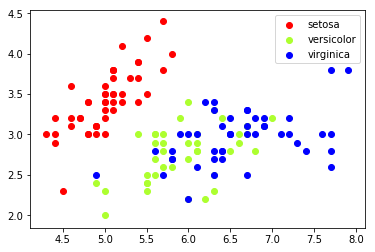

In [6]:
plt.figure(1)

colors = ['red','greenyellow','blue']
for i in xrange(len(colors)):
    xs = X_train[:,0][y_train==i]
    ys = X_train[:,1][y_train==i]
    plt.scatter(xs,ys,c=colors[i])
plt.legend(iris.target_names)
plt.show()

## Normalisation

Voir http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

In [7]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.1, random_state = 15)
X_train2 = X_train[:,:2]
X_test2 = X_test[:,:2]
print X_train.shape, X_train2.shape

(135, 4) (135, 2)


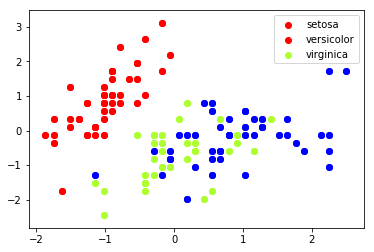

In [9]:
plt.figure(1)

colors = ['red','greenyellow','blue']
for i in xrange(len(colors)):
    xs = X_train[:,0][y_train==i]
    ys = X_train[:,1][y_train==i]
    plt.scatter(xs,ys,c=colors[i])
    xs = X_train[:,0][y_train==i]
    ys = X_train[:,1][y_train==i]
    plt.scatter(xs,ys,c=colors[i])
plt.legend(iris.target_names)
plt.show()

# Classification simple

Classifieur sur les données brutes
----------------------------------
Tout objet dans scikit_learn a des attributs qui sont accessibles par nomobjet.nom_attribut et dont les noms sont terminés par le caractère "souligné".
Par exemple un objet de la classe classifieur SGD a des paramètres (qui sont expliqués sur la doc en ligne à http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) et qui sont accessibles par ce moyen.


Dans sklearn quel que soit le modèle de prédiction (régression, projection, classification etc) on dispose des méthodes:
- fit (pour apprendre)
- predict (pour prédire)
- fit_and_transform (pour apprendre et transformer)

On choisit d'abord un modèle, puis on le fit puis on s'en sert pour prédire


In [11]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(alpha=0.001, n_iter=200, loss="hinge", penalty="l2", eta0=0.01)
clf.fit(X_train2, y_train)
print clf
print clf.coef_
print clf.intercept_

SGDClassifier(alpha=0.001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=200, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
[[-4.11727556  2.10041008]
 [ 0.05409646 -1.04799122]
 [ 1.45599728 -0.06420096]]
[-2.86723368 -0.9759459  -0.82246065]


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


# Affichage des frontières de  décision

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/pyplot.py:3315: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


SGDClassifier(alpha=0.1, average=False, class_weight=None, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=4, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
[-2.90512069 -2.14199995 -1.37887921 -0.61575847  0.14736228  0.91048302
  1.67360376  2.4367245   3.19984524  3.96296598  4.72608672]
[ 1.08355505  1.05996337  1.03637168  1.01277999  0.98918831  0.96559662
  0.94200493  0.91841325  0.89482156  0.87122987  0.84763819]
[ 86.53156927  68.41961113  50.30765298  32.19569483  14.08373669
  -4.02822146 -22.14017961 -40.25213775 -58.3640959  -76.47605405
 -94.58801219]


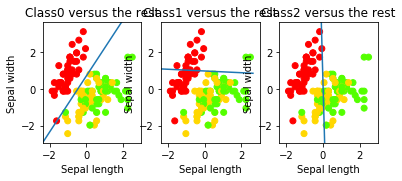

In [12]:
x_min, x_max = X_train2[:,0].min() - .5, X_train2[:,0].max() + .5
y_min, y_max = X_train2[:,1].min() - .5, X_train2[:,1].max() + .5
xs = np.arange(x_min, x_max, 0.5)
fig, axes = plt.subplots(1,3)

clf = SGDClassifier(alpha=0.1, n_iter=4, loss="hinge", penalty="l2", eta0=0.01)

clf.fit(X_train2, y_train)

print clf

for i in [0, 1, 2]:
    axes[i].set_title('Class'+ str(i) + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_aspect('equal')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    plt.sca(axes[i])
    #ytrain= np.ones(y_train.shape)
    #ytrain[y_train==i] = 0
    #ytrain[y_train==i] = 1
    #print ytrain, y_train
    plt.scatter(X_train2[:,0], X_train2[:,1], c=y_train, cmap = plt.cm.prism)
    #clf.fit(X_train, y_train)
    ys = (-clf.intercept_[i] - xs * clf.coef_[i,0] / clf.coef_[i,1])
    plt.plot(xs,ys,hold=True)
    #print clf
    #print xs
    print ys
    
plt.show()

In [14]:
clf.fit(X_train2, y_train)
print "Hyperplans : ", clf.coef_
print "Biais : ",  clf.intercept_

Hyperplans :  [[-1.18203676  0.7664097 ]
 [ 0.04486682 -0.56212442]
 [ 0.99352196 -0.04053414]]
Biais :  [-0.63759467 -0.95187235 -0.63346779]


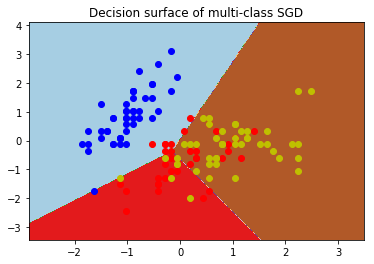

In [15]:
h = .02  # step size in the mesh
colors = "bry"

x_min, x_max = X_train2[:, 0].min() - 1, X_train2[:, 0].max() + 1
y_min, y_max = X_train2[:, 1].min() - 1, X_train2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])   # np.c_ = concaténation de deux matrices
# Put the result into a color plot
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis('tight')

# Plot also the training points
for i, color in zip(clf.classes_, colors):
    idx = np.where(y_train == i)
    plt.scatter(X_train2[idx, 0], X_train2[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)
plt.title("Decision surface of multi-class SGD")
plt.axis('tight')
plt.show()

# Calcul de performances

In [16]:
from sklearn import metrics
clf.fit(X_train2,y_train)
print clf.score(X_train2, y_train)
print clf.score(X_test2, y_test)


0.755555555556
0.8


# Validation croisée

La validation croisée permet d'avoir une meilleure estimation de la performance en génaralisation et de la variance de l'estimateur.


In [17]:
from sklearn import cross_validation

k_fold = cross_validation.KFold(n=6, n_folds=3) # indices=True)


for train_indices, test_indices in k_fold:
    print 'Train: %s | test: %s' % (train_indices, test_indices)

Train: [2 3 4 5] | test: [0 1]
Train: [0 1 4 5] | test: [2 3]
Train: [0 1 2 3] | test: [4 5]


### On calcule la performance sur les K plis en généralisation sur XTrain2 (Données réduites à 2 composantes)

In [27]:
kfold = cross_validation.KFold(len(X_train2), n_folds=5)
[clf.fit(X_train2[i_train], y_train[i_train]).score(X_train2[i_test], y_train[i_test]) for i_train, i_test in kfold]

[0.77777777777777779,
 0.77777777777777779,
 0.70370370370370372,
 0.70370370370370372,
 0.77777777777777779]

### On calcule la performance sur les K plis en généralisation sur XTrain (expliquez la différence de performance)

In [28]:
kfold = cross_validation.KFold(len(X_train), n_folds=5)
[clf.fit(X_train[i_train], y_train[i_train]).score(X_train[i_test], y_train[i_test]) for i_train, i_test in kfold]

[0.92592592592592593,
 0.88888888888888884,
 0.77777777777777779,
 0.77777777777777779,
 0.85185185185185186]

### Idem sur l'ensemble des données 

In [29]:
kfold = cross_validation.KFold(len(X_scaled), n_folds=5)
[clf.fit(X_scaled[i_train], y[i_train]).score(X_scaled[i_test], y[i_test]) for i_train, i_test in kfold]

[1.0, 0.80000000000000004, 0.0, 0.80000000000000004, 0.13333333333333333]

# Grid search pour la sélection de modèles

Certains paramètres ne peuvent être appris automatiquement:
- Les modèles sont définis par de nombreux paramètres dont certains, mais pas tous, sont apprenables automatiquement. 
- Les algorithmes d'optimisation requièrenet le plus souvent de fixer a priori des hyper-paramètres qui conditionnent leur comportement. 

Pour ces paramètres une possibilité est de tester plusieurs valeurs possibles par une exploration exhaustive (GridSearch) et de choisir les meilleurs. 

Voir http://scikit-learn.org/stable/modules/grid_search.html

In [31]:
from sklearn import svm, grid_search, datasets
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svr = svm.SVC()
clf = grid_search.GridSearchCV(svr, parameters)
clf.fit(iris.data, iris.target)
print clf.grid_scores_

[mean: 0.98000, std: 0.01602, params: {'kernel': 'linear', 'C': 1}, mean: 0.97333, std: 0.00897, params: {'kernel': 'rbf', 'C': 1}, mean: 0.97333, std: 0.03697, params: {'kernel': 'linear', 'C': 10}, mean: 0.98000, std: 0.01601, params: {'kernel': 'rbf', 'C': 10}]


In [33]:
from sklearn import grid_search, datasets
from sklearn.linear_model import SGDClassifier

parameters = {'alpha':[0.001, 0.01, 0.1, 1],'eta0':[0.1, 0.05, 0.01, 0.005], 'n_iter':[2, 5, 10, 10, 100]}
sgdc = SGDClassifier()
clf = grid_search.GridSearchCV(sgdc, parameters, cv=10)
clf.fit(X_scaled, y)


print clf.grid_scores_
print clf.best_score_
print clf.best_params_
print clf.best_estimator_



[mean: 0.92000, std: 0.06532, params: {'alpha': 0.001, 'eta0': 0.1, 'n_iter': 2}, mean: 0.90000, std: 0.10000, params: {'alpha': 0.001, 'eta0': 0.1, 'n_iter': 5}, mean: 0.87333, std: 0.06289, params: {'alpha': 0.001, 'eta0': 0.1, 'n_iter': 10}, mean: 0.92000, std: 0.07180, params: {'alpha': 0.001, 'eta0': 0.1, 'n_iter': 10}, mean: 0.89333, std: 0.09043, params: {'alpha': 0.001, 'eta0': 0.1, 'n_iter': 100}, mean: 0.90667, std: 0.06799, params: {'alpha': 0.001, 'eta0': 0.05, 'n_iter': 2}, mean: 0.86667, std: 0.05963, params: {'alpha': 0.001, 'eta0': 0.05, 'n_iter': 5}, mean: 0.94000, std: 0.06960, params: {'alpha': 0.001, 'eta0': 0.05, 'n_iter': 10}, mean: 0.91333, std: 0.08459, params: {'alpha': 0.001, 'eta0': 0.05, 'n_iter': 10}, mean: 0.91333, std: 0.08969, params: {'alpha': 0.001, 'eta0': 0.05, 'n_iter': 100}, mean: 0.93333, std: 0.06667, params: {'alpha': 0.001, 'eta0': 0.01, 'n_iter': 2}, mean: 0.91333, std: 0.07333, params: {'alpha': 0.001, 'eta0': 0.01, 'n_iter': 5}, mean: 0.9466

### Utilisation de Pipeline
Pipeline permet de réaliser une chaine de traitement: normalisation, classification / régression, etc.

In [34]:
from sklearn import svm
from sklearn import preprocessing
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

X2 = X
X_tr, X_te, y_tr, y_te = train_test_split(X2,y,test_size=0.1, random_state = 1)
X_tr2 = X_tr[:,:2]
X_te2 = X_te[:,:2]
print X_tr2.shape, X_te2.shape


clf = svm.SVC(kernel='linear')
pipe = Pipeline([('norm', preprocessing.StandardScaler()), ('svm', clf)])

pipe.set_params(svm__C=.1).fit(X_tr2, y_tr)
prediction_tr = pipe.predict(X_tr2)
prediction_te = pipe.predict(X_te2)

print(pipe.score(X_tr2, y_tr))
print(pipe.score(X_te2, y_te))



(135, 2) (15, 2)
0.792592592593
0.8
